## CAPSTONE PROJECT 2
CREDIT CARD FRAUD DETECTION :
By Balancing the Data

IMPORTING THE LIBRARIES

In [ ]:
# Data Collection, Loading & Visualization Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm, skew

# Machine Learning Model Building, Hyper Tunning & Evalution Matrix Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.under_sampling import NearMiss
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

**LOADING THE DATASET**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data Science/Datasets/creditcard.csv')
df=data.copy()
#Using 'df' beacuse we can get head, tail and the shape of the data set in a single code
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Here we can see that we have 284807 Rows and 31 Columns.


**Information about the Data**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Displaying the concise information about the DataFrame, checking the null values and the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Here we understand that each column consist float datatype except the y variable which is int.
There are no null values in the dataset.

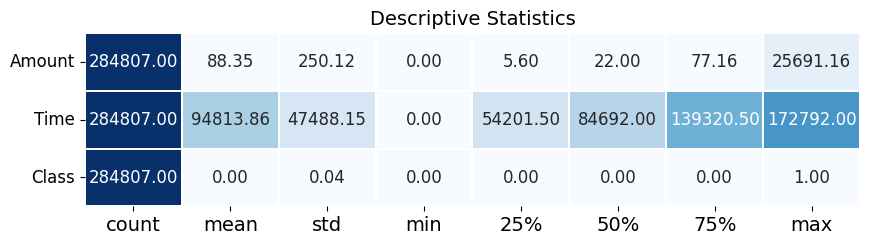

In [ ]:
# statistical summary:
cols =df[["Amount","Time","Class"]]
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = 'Blues',
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()

desc_stats(cols)

Getting the Count: The number of non-null values in each column.

Mean: The average value of each column.

Standard Deviation (std): It indicates how much individual data points deviate from the mean.

Minimum (min): The smallest value in each column.

25th Percentile (25%): Also known as the first quartile, it's the value below which 25% of the data falls.

Median (50%): Also known as the second quartile or the median, it's the middle value when the data is sorted. It represents the central tendency.

75th Percentile (75%): Also known as the third quartile, it's the value below which 75% of the data falls.

Maximum (max): The largest value in each column

DATA VISUALIZATION

In [ ]:
# correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='summer_r')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733


In [ ]:
#checking for imbalance data
count=pd.value_counts(df['Class'],sort=True)
count

0    284315
1       492
Name: Class, dtype: int64

<Axes: >

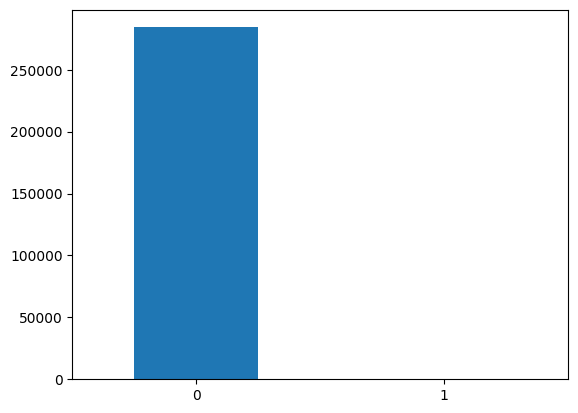

In [ ]:
count.plot(kind='bar',rot=0)

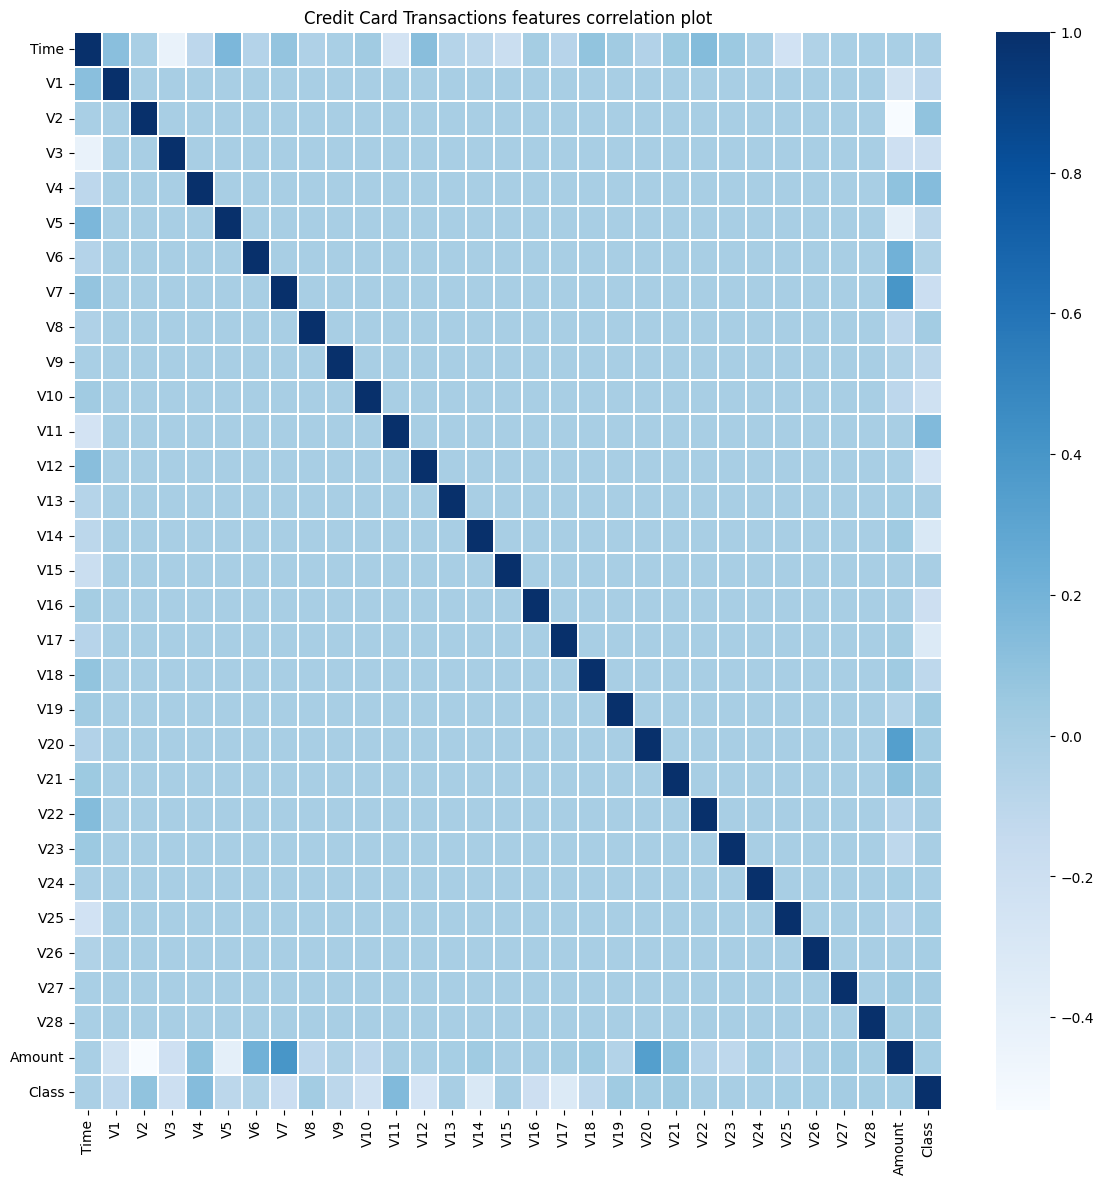

In [ ]:
# correlation heatmap:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

DATA PREPROCESSING

In [ ]:
# Distribution of Fraud and Normal Transactions

px.pie(df, names="Class", title="Distribution of Fraud and Normal Transactions:(Normal:0 | Fraud:1)")

In [ ]:
# making Hour feature from Time feature
df["Hour"] = df["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
df["Hour"] = df["Hour"].astype("int")

# time vs fraud

# Transaction count with non frauds over time(Hour)
count_0 = df[df['Class']==0].groupby('Hour').count()["Class"]

# Transaction count with frauds over time(Hour)
count_1 = df[df['Class']==1].groupby('Hour').count()["Class"]

# Concatenate
counts_df = pd.concat([count_0, count_1], axis=1, keys=["Class 0", "Class 1"]).fillna(0)
df_counts = counts_df.reset_index()


# Subplots
fig = make_subplots(
    rows=1, cols=2,

    subplot_titles=("Non Frauds","Frauds"))
fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 0"], name="Transactions", marker = {'color' : "#1E90FF"}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Class 1"], name="Transactions", marker = {'color' : "#FF4500"}),
                 row=1, col=2)

fig['layout']['xaxis']['title']='Hour'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Hour'
fig['layout']['yaxis2']['title']='Transaction'

fig.show()

## MODEL BUILDING

In [ ]:
X=df.drop(["Class"],axis=1).values
y=df["Class"].values

#Undersampling
nm=NearMiss()
X_res,y_res=nm.fit_resample(X,y)
X_res.shape

(984, 31)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=7,stratify=y_res)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(688, 31)
(296, 31)
(688,)
(296,)


In [ ]:
# standardization of data
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
def model_val(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(model)

    print(f"Test Data Accuracy: {accuracy_score(y_test,y_pred)}")
    print("Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print("Classification_report: \n",classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    # Print confusion matrix
    print("Confusion Matrix:")
    print(cm)

In [ ]:
lr = LogisticRegression()
model_val(lr,X_train,X_test,y_train,y_test)

LogisticRegression()
Test Data Accuracy: 0.9527027027027027
Model Test F1 Score is:  0.9507042253521126
Classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       148
           1       0.99      0.91      0.95       148

    accuracy                           0.95       296
   macro avg       0.96      0.95      0.95       296
weighted avg       0.96      0.95      0.95       296

Confusion Matrix:
[[147   1]
 [ 13 135]]


In [ ]:
svc = SVC()
model_val(svc,X_train,X_test,y_train,y_test)

SVC()
Test Data Accuracy: 0.9594594594594594
Model Test F1 Score is:  0.9577464788732395
Classification_report: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       148
           1       1.00      0.92      0.96       148

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

Confusion Matrix:
[[148   0]
 [ 12 136]]


In [ ]:
knn=KNeighborsClassifier()
model_val(knn,X_train,X_test,y_train,y_test)

KNeighborsClassifier()
Test Data Accuracy: 0.9256756756756757
Model Test F1 Score is:  0.9202898550724637
Classification_report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       148
           1       0.99      0.86      0.92       148

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

Confusion Matrix:
[[147   1]
 [ 21 127]]


In [ ]:
dtc=DecisionTreeClassifier()
model_val(dtc,X_train,X_test,y_train,y_test)

DecisionTreeClassifier()
Test Data Accuracy: 0.9594594594594594
Model Test F1 Score is:  0.9594594594594594
Classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       148
           1       0.96      0.96      0.96       148

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

Confusion Matrix:
[[142   6]
 [  6 142]]


In [ ]:
nb=GaussianNB()
model_val(nb,X_train,X_test,y_train,y_test)

GaussianNB()
Test Data Accuracy: 0.9391891891891891
Model Test F1 Score is:  0.9366197183098591
Classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       148
           1       0.98      0.90      0.94       148

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

Confusion Matrix:
[[145   3]
 [ 15 133]]


In [ ]:
# LogisticRegression score Before Hyperparameter Tuning: 95.27
# ------------------------------------------------------
# SVC score Before Hyperparameter Tuning: 95.94
# --------------------------------------------------------
# KNN score Before Hyperparameter Tuning: 92.56
# ------------------------------------------------------
# DTC score Before Hyperparameter Tuning: 95.94
# --------------------------------------------------------
# GaussianNB score Before Hyperparameter Tuning: 93.91

# We are now aiming to enhance the accuracy of our model.
# To achieve this, we will implementing hyperparameter tuning to optimize our model's performance.
# Among the Five models, Gradient Boosting performed the best.
# As a result, we will choose Gradient Boosting with its optimized parameters as our final model.

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train,y_train)
y_pred=dt_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Decision Tree Classifier')
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC curve values
y_prob = dt_classifier.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)


feature_importances = dt_classifier.feature_importances_
feature_names = df.columns  # Assuming X_train is a DataFrame


Decision Tree Classifier
Accuracy: 0.972972972972973

Confusion Matrix:
[[144   4]
 [  4 144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       148
           1       0.97      0.97      0.97       148

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



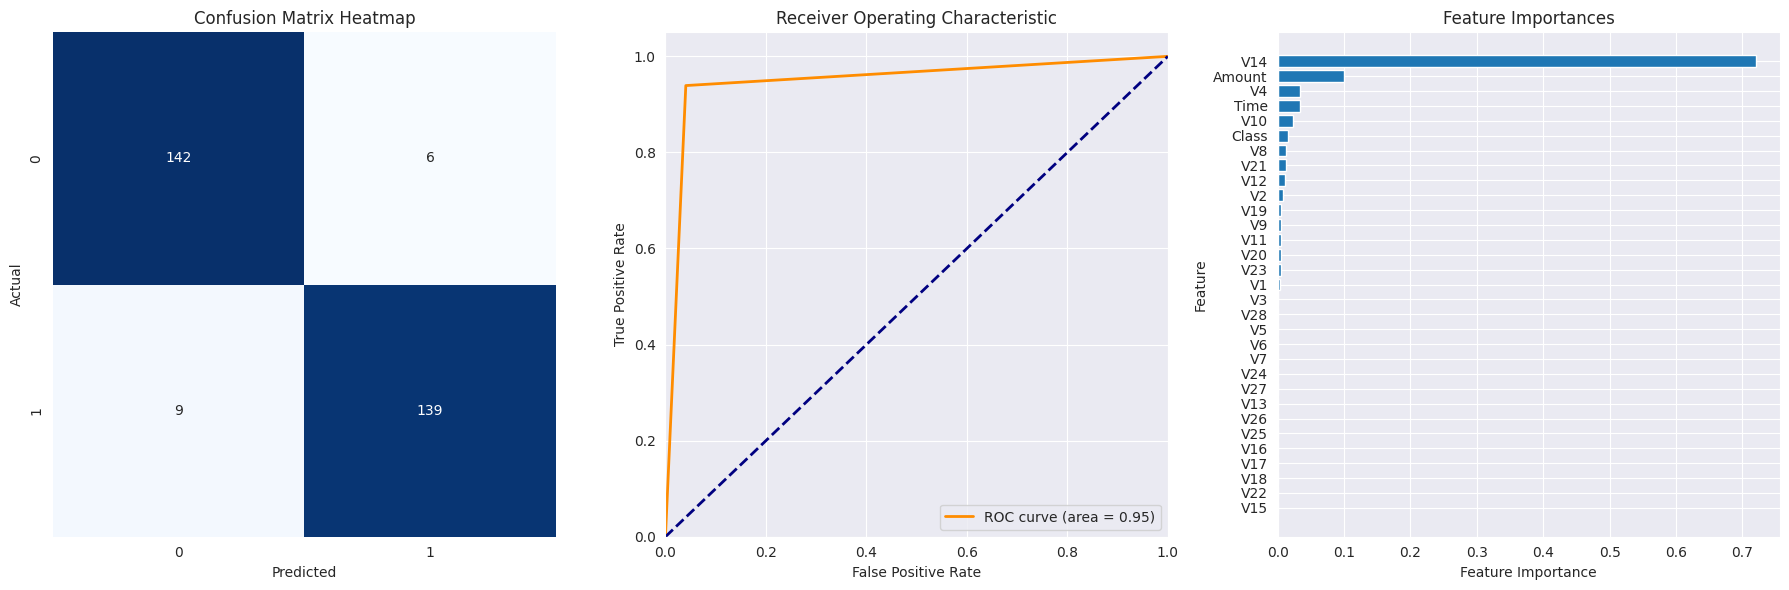

In [ ]:
plt.figure(figsize=(18, 6))

# Confusion Matrix Heatmap
plt.subplot(1, 3, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")

# AUC-ROC Curve
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Feature Importances Diagram
plt.subplot(1, 3, 3)
sorted_idx = feature_importances.argsort()
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")

# Adjust layout and display
plt.tight_layout()
plt.show()


In [ ]:
results_df = pd.DataFrame({'Fraud Prediction': y_pred, 'Actual Fraud': y_test})
results_df.sample(20).T

,152,130,116,49,137,168,231,294,219,170,121,91,127,241,187,103,247,9,102,106
Fraud Prediction,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,1,0
Actual Fraud,0,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,0,1,1,0


# Conclusion

* In this Credit Card Fraud prediction process, we started by examining a dataset with 284807 rows and 31 columns. It contained numerical variables, and we noticed an imbalance in Fraud Class, with less fraud of (0.173%).

* To address the data's characteristics, we performed data preprocessing.

* Standardization was used to scale certain features for better model convergence.

* We divided the dataset into training and testing sets and explored Five different machine learning models: Logistic Regression, Support Vector Classifier (SVC), KNearest Neighbour, Decision Tree Classifier and GaussianNB. However, our focus was on Decision Tree Classifier, which showed the best performance in terms of accuracy.

* The chosen Decision Tree Classifier model achieved an accuracy of approximately 97.29%. It effectively balanced precision and recall. This result ensures that the company can minimize potential financial losses.

* The top three influential factors for Fraud Detection were V14, Amount, V4.

* In conclusion, by systematically preprocessing the data, selecting the right model, we successfully built a model that enhances accuracy and lowers the risk of approving loans for ineligible candidates. This helps the company make more informed lending decisions and reduces the chances of financial setbacks.